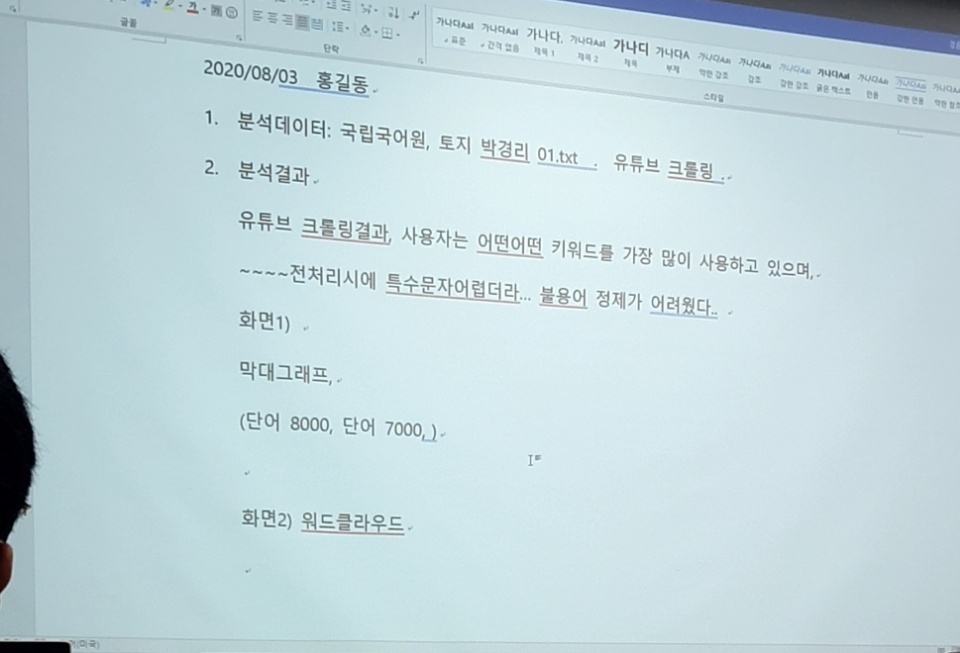

개요 : 20대가 어떤 부분에 관심이 많은지 궁금하여서, '네이트 20대 판' 을 크롤링 함

결과 :

1. 20대는 친구 및 이성친구에 관심이 많다. (사랑, 연애)
2. 고민이 생기면, 고민이나 추천에 대한 조언을 게시판 유저들에게 구한다.
3. 돈, 사랑, 엄마, 대학, 연애, 술집, 알바 등 '대학생'과 관련된 키워드가 많이 나왔다 
  * 이를 통해, '네이트 20대 판' 의 유저는 20대 중후반 보다는 20대 초반이 많이 이용한다는 사실을 예측할 수 있다.
  
어려웠던 점 : 
1. 크롤링 오랜 시간이 걸린다는 점
2. 불용어 정제가 어려웠음 
3. 단순히 키워드만을 보고, 핵심을 파악할 수가 없음
4. ex) '남자친구' , '여자친구' => '남자' '친구' '여자' '친구' 이렇게 인식해서 단어가 나옴



In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os

In [24]:
base_url = 'https://pann.nate.com/' # 크롤링할 사이트 ( 기본  url)
my_url = 'talk/c20002'
page_num= '?page=' #


In [25]:
options = Options()
browser = webdriver.Chrome(options=options)
browser.get(base_url+my_url)
time.sleep(1)

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [74]:



trend20_list = []


for a in range(1,50) :
    options = Options()
    options.headless = True
    browser = webdriver.Chrome(options=options) # chrome web driver를 같은 폴더에 넣어 주어야함
    browser.implicitly_wait(0.2) 
    url =base_url+my_url+page_num+str(a)
    print(url)
    browser.get(url)
#     print(base_url+my_url+a)
 #   time.sleep(0.2) 
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')

    first_lists = soup.findAll('td', {'class' : 'subject'})


    for item in first_lists : 
        trend20 = item.text.replace('\t\t\t\t\t\t\t\t\t','').replace('\t\t\t\t\t\t\t','').replace('\n\n','').replace('\n','').replace('[댓글과조언]','').replace('[댓글부탁해]','').replace('[이것좀봐줘]','').replace('[꼭조언부탁]','').replace('[드루와]','').replace('[설문조사]','').replace('[추천해줘]','')
        trend20_list.append(trend20)
    



https://pann.nate.com/talk/c20002?page=1
https://pann.nate.com/talk/c20002?page=2
https://pann.nate.com/talk/c20002?page=3
https://pann.nate.com/talk/c20002?page=4
https://pann.nate.com/talk/c20002?page=5
https://pann.nate.com/talk/c20002?page=6
https://pann.nate.com/talk/c20002?page=7
https://pann.nate.com/talk/c20002?page=8
https://pann.nate.com/talk/c20002?page=9
https://pann.nate.com/talk/c20002?page=10
https://pann.nate.com/talk/c20002?page=11
https://pann.nate.com/talk/c20002?page=12
https://pann.nate.com/talk/c20002?page=13
https://pann.nate.com/talk/c20002?page=14
https://pann.nate.com/talk/c20002?page=15
https://pann.nate.com/talk/c20002?page=16
https://pann.nate.com/talk/c20002?page=17
https://pann.nate.com/talk/c20002?page=18
https://pann.nate.com/talk/c20002?page=19
https://pann.nate.com/talk/c20002?page=20
https://pann.nate.com/talk/c20002?page=21
https://pann.nate.com/talk/c20002?page=22
https://pann.nate.com/talk/c20002?page=23
https://pann.nate.com/talk/c20002?page=24
h

In [75]:
trend20_info = pd.DataFrame(trend20_list)

trend20_info.head()


,0
0,난 지금 한국남녀가 왜 싸우는지 알겠음
1,스압주의)어릴때 고딩때 현재 61키로
2,남자도 여자한테 말 실수하고...(1)
3,여성분들 매달 꾸밈비 얼마나...(3)
4,야 이 단어 갑자기생각안나는...(6)


In [76]:
trend20_info.to_csv('trend20_info.csv',encoding='utf-8') 

In [3]:
df = pd.read_csv('trend20_info.csv',encoding='utf-8')

df = df.drop('Unnamed: 0',axis=1)

df

,0
0,난 지금 한국남녀가 왜 싸우는지 알겠음
1,스압주의)어릴때 고딩때 현재 61키로
2,남자도 여자한테 말 실수하고...(1)
3,여성분들 매달 꾸밈비 얼마나...(3)
4,야 이 단어 갑자기생각안나는...(6)
...,...
1465,페미들의 사고방식(3)
1466,일베충 ㅅㄲ들아 박원순 시장...(1)
1467,주로 군대에서 무슨 주제로 ...(13)
1468,성인되면 해가 지날수록 새로...(3)


In [4]:
import pandas as pd
df = pd.read_csv('trend20_info.csv',encoding='utf-8')
trend20_posts = df.get('0')

from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")



In [5]:
trend20_posts

0        난 지금 한국남녀가 왜 싸우는지 알겠음 
1         스압주의)어릴때 고딩때 현재 61키로 
2        남자도 여자한테 말 실수하고...(1) 
3        여성분들 매달 꾸밈비 얼마나...(3) 
4        야 이 단어 갑자기생각안나는...(6) 
                 ...           
1465               페미들의 사고방식(3)
1466      일베충 ㅅㄲ들아 박원순 시장...(1)
1467     주로 군대에서 무슨 주제로 ...(13)
1468      성인되면 해가 지날수록 새로...(3)
1469                전쟁영웅 백선엽 별세
Name: 0, Length: 1470, dtype: object

In [17]:
trend20_stop_words = "게 글 말 분 살 거 내 대 바 때 애 실제 사람 나 것 이거 인 년 중 남 제 자신 너 자기"
trend20_stop_words = trend20_stop_words.split(' ')
trend20_stop_words[0:10]

trend20_nouns = []
for post in trend20_posts:
    for noun in tagger.nouns(post):
        if noun not in trend20_stop_words:
            trend20_nouns.append(noun)

trend20_nouns[0:10]

['난', '한국', '남녀', '스압', '주의', '고딩', '남자', '여자', '실수', '여성']

{'친구': 118, '남자': 87, '여자': 82, '남친': 34, '일': 28, '대학': 28, '사랑': 26, '한국': 19, '조언': 19, '술집': 18, '추천': 18, '생각': 16, '연애': 16, '엄마': 15, '알바': 15, '이유': 15, '스타': 15, '뭐': 14, '대학생': 14, '돈': 13}


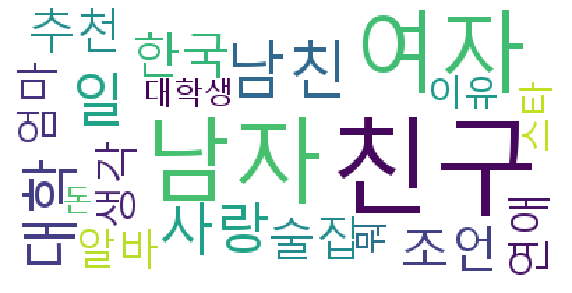

In [24]:
from collections import Counter
num_top_nouns = 20
trend20_nouns_counter = Counter(trend20_nouns)
trend20_top_nouns = dict(trend20_nouns_counter.most_common(num_top_nouns))
print(trend20_top_nouns)

from wordcloud import WordCloud
trend20_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
trend20_wc.generate_from_frequencies(trend20_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 20)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(trend20_wc)